### The `requests` Library

https://requests.readthedocs.io/en/master/

In [1]:
import requests

Let's first look at how we can emulate the `GET` requests that browsers make when we request pages from web sites.

Here we're going to pull the home page of the site `https://www.stackoverflow.com` - since we don't specify anything in the URL beyond just the domain, we'll get whatever "default" page is defined by that site:

In [2]:
response = requests.get("https://www.stackoverflow.com")

Now we can look at the status code/message returned in the `response` object:

In [3]:
response.status_code, response.reason

(200, 'OK')

As you can see, the status was `200/OK` - which means our request was successful.

The response is going to be HTML, not JSON, so we can recover it using the `text` property:

In [4]:
response.text

'<!DOCTYPE html>\r\n\r\n\r\n    <html class="html__responsive html__unpinned-leftnav">\r\n\r\n    <head>\r\n\r\n        <title>Stack Overflow - Where Developers Learn, Share, &amp; Build Careers</title>\r\n        <link rel="shortcut icon" href="https://cdn.sstatic.net/Sites/stackoverflow/Img/favicon.ico?v=ec617d715196">\r\n        <link rel="apple-touch-icon" href="https://cdn.sstatic.net/Sites/stackoverflow/Img/apple-touch-icon.png?v=c78bd457575a">\r\n        <link rel="image_src" href="https://cdn.sstatic.net/Sites/stackoverflow/Img/apple-touch-icon.png?v=c78bd457575a"> \r\n        <link rel="search" type="application/opensearchdescription+xml" title="Stack Overflow" href="/opensearch.xml">\r\n        <meta name="description" content="Stack Overflow is the largest, most trusted online community for developers to learn, share&#x200B; &#x200B;their programming &#x200B;knowledge, and build their careers."/>\r\n        <meta name="viewport" content="width=device-width, height=device-hei

This is the HTML your browser would display after it does it's `GET` request.

Responses usually also contain **headers** - we don't see those in our browsers, but it may affect how the browser behaves. Using `requests`, the headers are returned as a `dict`:

In [5]:
for key, value in response.headers.items():
    print(f'{key}: \t{value}')

Connection: 	keep-alive
cache-control: 	private
content-type: 	text/html; charset=utf-8
content-encoding: 	gzip
server: 	Microsoft-IIS/10.0
strict-transport-security: 	max-age=15552000
x-route-name: 	Home/Index
x-frame-options: 	SAMEORIGIN
x-flags: 	AA
x-aspnet-duration-ms: 	3
x-request-guid: 	7ea480b3-8879-4d33-b7f2-9acf21fc85df
x-is-crawler: 	1
x-providence-cookie: 	c23777d9-2949-6aa0-34b0-a9700ca197c2
feature-policy: 	microphone 'none'; speaker 'none'
content-security-policy: 	upgrade-insecure-requests; frame-ancestors 'self' https://stackexchange.com
x-page-view: 	1
Accept-Ranges: 	bytes
Date: 	Wed, 21 Oct 2020 02:42:46 GMT
Via: 	1.1 varnish
X-Served-By: 	cache-lax10631-LGB
X-Cache: 	MISS
X-Cache-Hits: 	0
X-Timer: 	S1603248166.296207,VS0,VE76
Vary: 	Accept-Encoding,Fastly-SSL
X-DNS-Prefetch-Control: 	off
transfer-encoding: 	chunked


Notice one of the keys in this dictionary: `content-type` - it tells the browser that the content is **html** and the unicode character encoding is `utf-8`. Notice also that `content-encoding` has a value of `gzip` - this is because the content was actually compressed by the server befopre sending out the response - and in this case both `requests` and our browser would decompress the response - this helps keep the amount of data transmitted over the web as compact as possible.

We usually don't do much with response headers, although some APIs may return extra information in the headers (maybe how long the request took to compute on the server side) - these are going to be API specific, so you'll need to read your API docs.

Next, let's try using a `GET` request with Google's search - although Google provides an API for search (you'll have to sign up to get a security token), we're just going to simulate using a GET request the way your browser does, for example:

- `https://www.google.com` --> google search home page
- `https://www.google.com?q=text to search` --> searches "text to search"

In [6]:
query_params = {
    'q': 'python http requests',
    'num': 5
}
response = requests.get(
    "https://www.google.com/search", 
    params=query_params
)

In [7]:
response.status_code, response.reason

(200, 'OK')

Once more our request was succesful, and the response returned is HTML:

In [8]:
response.headers['content-type']

'text/html; charset=ISO-8859-1'

In [9]:
response.headers['content-encoding']

'gzip'

'<!doctype html><html lang="en"><head><meta charset="UTF-8"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>python http requests - Google Search</title><script nonce="Dmkt8a6TUMTLzKWOgmSskw==">(function(){\ndocument.documentElement.addEventListener("submit",function(b){var a;if(a=b.target){var c=a.getAttribute("data-submitfalse");a="1"==c||"q"==c&&!a.elements.q.value?!0:!1}else a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var a;a:{for(a=b.target;a&&a!=document.documentElement;a=a.parentElement)if("A"==a.tagName){a="1"==a.getAttribute("data-nohref");break a}a=!1}a&&b.preventDefault()},!0);}).call(this);(function(){\nvar a=window.performance;window.start=Date.now();a:{var b=window;if(a){var c=a.timing;if(c){var d=c.navigationStart,f=c.responseStart;if(f>d&&f<=window.start){window.start=f;b.wsrt=f-d;break a}}a.now&&(b.wsrt=Math.floor(a.now()))}}window.google=window.g
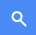
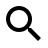

In [10]:
response.text

Note that if we try to read the `json` property we would get an exception since this response does not contain JSON data:

In [11]:
try:
    response.json()
except ValueError as ex:
    print(ex)

Expecting value: line 1 column 1 (char 0)


Also, if we make a bad request, such as an unkown resource path, we'll get a different response `status_code`, not a Python exception:

In [12]:
response = requests.get('https://www.google.com/some_dummy_page')

In [13]:
response.status_code, response.reason

(404, 'Not Found')

We can force a Python exception, by using the `raise_for_status` method on the response object:

In [14]:
response.raise_for_status()

HTTPError: 404 Client Error: Not Found for url: https://www.google.com/some_dummy_page

So if we want a Python exception to occur when a status code is not in the `2xx` range, we can do this:

In [15]:
try:
    response = requests.get('https://www.google.com/bogus')
    response.raise_for_status()
except requests.HTTPError as ex:
    print(ex)

404 Client Error: Not Found for url: https://www.google.com/bogus


But if the request is succesful, no exception will be raised:

In [16]:
try:
    response = requests.get('https://www.google.com')
    response.raise_for_status()
except requests.HTTPError as ex:
    print(ex)

One other piece of information that may be interesting in the response, is the `cookies` attribute where we can see what cookies are being saved to our machine. Again, it is a dictionary:

In [17]:
response = requests.get('http://www.nyt.com')
for key, value in response.cookies.items():
    print(f'{key}: {value}')

nyt-a: Ury9X9HNwoJUFkwHU2Uftp
nyt-gdpr: 0
nyt-geo: US
nyt-purr: cfhhcfhhhck


Now, let's look at using a REST API with JSON data. As we covered in the previous set of lectures, you'll need access to some REST API and most likely will need an authentication token.

For our examples, we are going to use the REST API provided by:

https://www.finnhub.io/

You'll need to retrieve your API key from that site after you log in (discussed in previous lecture on REST APIs).

In [18]:
API_KEY = 'xxxxxxxxxxxxxxxxxx'

### CAUTION!!

This API key is a **secret** - do not share it with anyone, and most definitely do not post it on the web anywhere! Be careful to remove it if you share your Jupyter notebook/Python code with someone,s or use `githib` for source control.

A simple approach (not perfect, but better than nothing), would be to save your token in a file, and read the token back into your notebook/Python code from that file. Then, when you share the notebook, you simply don't share the "secret" file.

Here, I have a file called "secrets.txt" that contains a single line, my API token, and I can read it back this way:

In [19]:
with open('secrets.txt') as f:
    API_KEY = next(f).strip()

According to `finnhub.io`'s documentation, we can pass that token either as a query argument (`http://finnhub.io/api/v1/...?token=apiKey`), or we can pass it in the headers using the key `X-Finnhub-Token`.

Let's try it both ways:

In [20]:
base_url = 'https://finnhub.io/api/v1/'

We're going to retrieve stock quotes - see docs here: https://finnhub.io/docs/api#quote

In [21]:
url = f'{base_url}/quote'
params = {'symbol': 'AAPL', 'token': API_KEY}
response = requests.get(url, params)

In [22]:
response.status_code

200

In [23]:
response.headers['content-type']

'application/json; charset=utf-8'

As we can see, the response content type is JSON, and we can use the `json()` method from requests:

In [24]:
response.json()

{'c': 117.51,
 'h': 118.98,
 'l': 115.63,
 'o': 116.19,
 'pc': 115.98,
 't': 1603248236}

`requests` automatically deserialized the JSON response into a Python `dict`:

In [25]:
data = response.json()
data['o']

116.19

The string that `requests` deserializes is actually the one contained in the `text` attribute of the response:

In [27]:
response.text

'{"c":117.51,"h":118.98,"l":115.63,"o":116.19,"pc":115.98,"t":1603248236}'

It's just handy that `requests` will do the `loads` for us, essentially. But, if we prefer we can do it manually as well, deserializing the `text` attribute's value.

You'll notice that there is a `t` field returned in the JSON:

In [31]:
time = data['t']

In [32]:
time

1603248236

This is a POSIX epoch timestamp, so we can use Python to convert this epoch time into a more useful `datetime`:

In [33]:
from datetime import datetime

In [34]:
d = datetime.fromtimestamp(time)

In [35]:
d

datetime.datetime(2020, 10, 20, 19, 43, 56)

Now if we want to query another symbol, we just have to change our query parameter - however, since we are passing our token in the query params, we need to provide it as well:

In [36]:
params = {
    'symbol': 'MSFT',
    'token': API_KEY
}
response = requests.get(url=url, params=params)
response.raise_for_status()

In [37]:
response.json()

{'c': 214.56,
 'h': 217.35,
 'l': 213.0901,
 'o': 215.8,
 'pc': 214.22,
 't': 1603248412}

This means evey time we change our params, we have to remember to add our API token to it. Instead, we can use the headers, and not have to remember to pass it in the params every time:

In [38]:
headers = {
    'X-Finnhub-Token': API_KEY
}
for symbol in ['AAPL', 'MSFT', 'GOOG']:
    try:
        response = requests.get(
            url, 
            params={'symbol': symbol}, 
            headers=headers
        )
        response.raise_for_status()
        print(f'***** {symbol} *****')
        print(response.json())
    except requests.HTTPError as ex:
        print('Unable to retrieve data: {ex}')

***** AAPL *****
{'c': 117.51, 'h': 118.98, 'l': 115.63, 'o': 116.19, 'pc': 115.98, 't': 1603248421}
***** MSFT *****
{'c': 214.56, 'h': 217.35, 'l': 213.0901, 'o': 215.8, 'pc': 214.22, 't': 1603248422}
***** GOOG *****
{'c': 1556.73, 'h': 1577.5, 'l': 1525.67, 'o': 1527.05, 'pc': 1534.61, 't': 1603248422}


Let's look at one more, the `Company Profile 2` resource:

In [39]:
url = f'{base_url}/stock/profile2'
response = requests.get(
    url, 
    params={'symbol': 'AAPL'},
    headers=headers
)
response.json()

{'country': 'US',
 'currency': 'USD',
 'exchange': 'NASDAQ NMS - GLOBAL MARKET',
 'finnhubIndustry': 'Technology',
 'ipo': '1980-12-12',
 'logo': 'https://static.finnhub.io/logo/87cb30d8-80df-11ea-8951-00000000092a.png',
 'marketCapitalization': 2068723,
 'name': 'Apple Inc',
 'phone': '14089961010',
 'shareOutstanding': 17102.536,
 'ticker': 'AAPL',
 'weburl': 'https://www.apple.com/'}

Finally, let's see how we can use `POST`. The choices for `POST` calls to this API are quite limited (it is mainly a service for retrieving data, not creating resources).

However, they implement something called a **webhook**. Basically, you can define (in your Finnhub dashboard) a URL (on your server) that will be called when certain events happen on their end - in this case they have support for real-time earnings updates.

We don't have a web server available here for the callback, but we can still manage those webhooks, creating, listing and deleting them, so let's try that, even though they won't be fully "functional".

To create a webhook, we need to use the API defined here: https://finnhub.io/docs/api#webhook

In [40]:
base_webhook_url = f'{base_url}/webhook'

Let's create a couple of webhooks for receiving earnings updates for `AAPL` and `MSFT`:

In [41]:
post_data = {
    'event': 'earnings',
    'symbol': 'AAPL'
}

In [42]:
response = requests.post(
    url=f'{base_webhook_url}/add',
    headers=headers,
    json=post_data
)
print(response.status_code, response.reason)
print(response.json())

200 OK
{'id': 3190, 's': 'ok'}


And let's add a second one for `MSFT`:

In [43]:
response = requests.post(
    url=f'{base_webhook_url}/add',
    headers=headers,
    json={
        'event': 'earnings',
        'symbol': 'MSFT'
    }
)
print(response.status_code, response.reason)
print(response.json())

200 OK
{'id': 3191, 's': 'ok'}


Now let's read those webhooks back. According to the API docs, we have to issue a `GET` request to `.../webhook/list`, so let's do that:

In [44]:
response = requests.get(
    url=f'{base_webhook_url}/list',
    headers=headers
)
print(response.status_code, response.reason)
print(response.json())

200 OK
[{'id': 3190, 'name': 'earnings', 'symbol': 'AAPL', 'data': '{}'}, {'id': 3191, 'name': 'earnings', 'symbol': 'MSFT', 'data': '{}'}]


Finally, let's delete those webhooks. You'll notice that we have an `id` field associated with each webhook - this is the unique identifier for our webhooks, and we'll need to use that `id` value to specify which webhook we want to delete.

The API docs specify that to delete a webhook we need to use a `POST` to the URL `.../webhook/delete` and pass the `id` in the JSON data we send.

This is a bit unorthodox, since `DELETE` is an actual HTTP method and is more traditional for deleting resources, but as we discussed before, all this is entirely up to the API developers.

**Note**: I am just typing the id value directly in this request, you will therefore need to modify that id to match the webhooks you just created.

In [45]:
response = requests.post(
    url=f'{base_webhook_url}/delete',
    headers=headers,
    json={
        'id': 3190
    }
)
print(response.status_code, response.reason)
print(response.json())

200 OK
{'id': 3190, 's': 'ok'}


So this webhook was deleted succesfully - let's check by getting a list of all webhooks:

In [46]:
response = requests.get(
    url=f'{base_webhook_url}/list',
    headers=headers
)
print(response.status_code, response.reason)
print(response.json())

200 OK
[{'id': 3191, 'name': 'earnings', 'symbol': 'MSFT', 'data': '{}'}]


As you can see, only one left. Let's delete that last one:

In [47]:
response = requests.post(
    url=f'{base_webhook_url}/delete',
    headers=headers,
    json={
        'id': 3191
    }
)
print(response.status_code, response.reason)
print(response.json())

200 OK
{'id': 3191, 's': 'ok'}


In [48]:
response = requests.get(
    url=f'{base_webhook_url}/list',
    headers=headers
)
print(response.status_code, response.reason)
print(response.json())

200 OK
[]
